In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
from sklearn.cluster import KMeans
# Apply k-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)
# Add the cluster labels to the data
data['KMeans_Cluster'] = kmeans.labels_
# Display the cluster centers
print("K-Means Cluster Centers:\n", kmeans.cluster_centers_)

K-Means Cluster Centers:
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [10]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(data_scaled)

# Add the GMM cluster labels to the data
data['EM_Cluster'] = gmm.predict(data_scaled)

# Display the means and covariances of the clusters
print("EM Means:\n", gmm.means_)
print("EM Covariances:\n", gmm.covariances_)

EM Means:
 [[ 0.53745909 -0.39369142  0.6693573   0.64500292]
 [-0.93852253  0.98617415 -1.29410958 -1.24871335]
 [-1.53616188 -0.9148767  -1.05760659 -1.00758605]]
EM Covariances:
 [[[ 0.6041439   0.29261198  0.28890501  0.24177881]
  [ 0.29261198  0.53389164  0.16028899  0.21491843]
  [ 0.28890501  0.16028899  0.207522    0.2027757 ]
  [ 0.24177881  0.21491843  0.2027757   0.29967967]]

 [[ 0.13510948  0.19602161  0.00308347  0.01212811]
  [ 0.19602161  0.58216106  0.0018129   0.02637945]
  [ 0.00308347  0.0018129   0.00895969  0.00387616]
  [ 0.01212811  0.02637945  0.00387616  0.01965801]]

 [[ 0.1132855  -0.27943484  0.18318977  0.16256471]
  [-0.27943484  0.97422493 -0.42626817 -0.39428536]
  [ 0.18318977 -0.42626817  0.30445233  0.26469844]
  [ 0.16256471 -0.39428536  0.26469844  0.23383281]]]


In [13]:
print(data.head())

# Add the true labels for comparison
data['True_Label']=iris.target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   KMeans_Cluster  EM_Cluster  True_Label  
0               1           1           0  
1               2           1           0  
2               2           1           0  
3               2           1           0  
4               1           1           0  


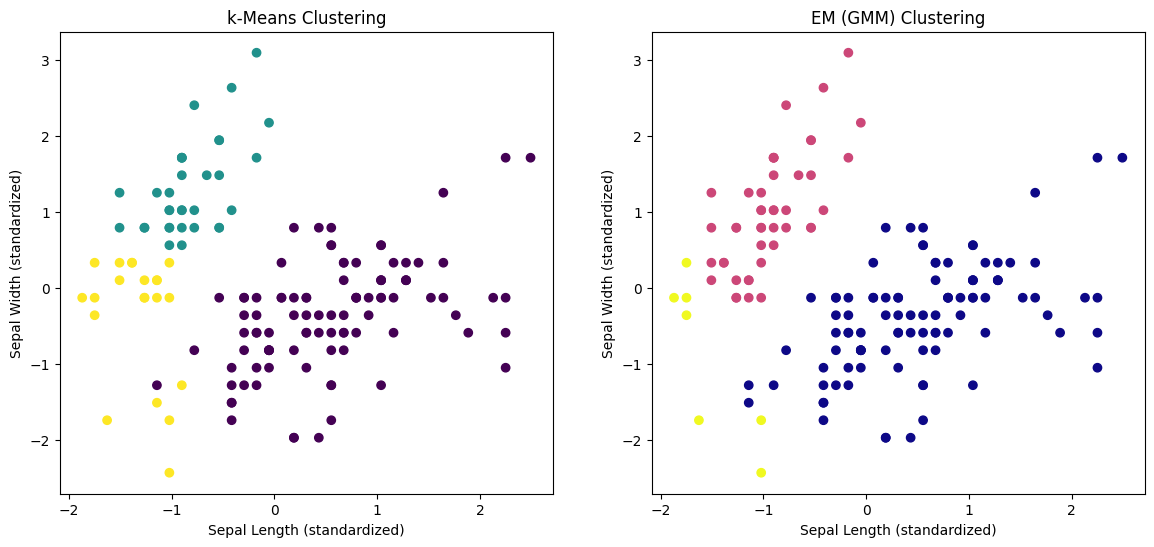

In [15]:
import matplotlib.pyplot as plt

# Plot k-Means clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('k-Means Clustering')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
# Plot EM clusters
plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['EM_Cluster'], cmap='plasma')
plt.title('EM (GMM) Clustering')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')

plt.show()

In [19]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# ARI for k-Means
ari_kmeans = adjusted_rand_score(data['True_Label'], data['KMeans_Cluster'])
print("ARI for k-Means: ", ari_kmeans)

# ARI for EM
ari_em = adjusted_rand_score(data['True_Label'], data['EM_Cluster'])
print("ARI for EM: ", ari_em)

# NMI for k-Means
nmi_kmeans = normalized_mutual_info_score(data['True_Label'], data['KMeans_Cluster'])
print("NMI for k-Means: ", nmi_kmeans)
# NMI for EM
nmi_em = normalized_mutual_info_score(data['True_Label'], data['EM_Cluster'])
print("NMI for EM: ", nmi_em)

ARI for k-Means:  0.432804702527474
ARI for EM:  0.5164585360868599
NMI for k-Means:  0.5895674488004073
NMI for EM:  0.657093812636084
